# 4 layer Neural Network Using numpy: 
4 layer neural network has been created for mnist dataset.
The initial layer is 784 neurons which is our input, second is our hidden layer 1 with 450 neurons with relu activation function and 50 percent dropout, third layer is hidden layer with 128 neurons with tanh activation function and dropout, fourth layer is hidden layer with 64 neurons with tanh activation without drouput and final output layer is 10 neuron with softmax activation since we are to predict 1 digit out of 10.

 I have used-
1. batch size of 100.
2. learning rate as .09
3. Data augmenttaion has been done using Image Data Generator

Visualization Plots
1. Confusion matrix has been plotted 
2. Plot for training and test accuracy
3. Plot for training and test loss
4. Common Errors have been predicted and plotted.

In [8]:
import sys,numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # loading the mnist dataset
x_train=x_train/255 # normalizing the x_train and x_test dataset
x_test=x_test/255
#Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.reshape(-1,28,28,1) # inorder to preprocess the data, reshaping into rank 4 matrix 
x_test = x_test.reshape(-1,28,28,1)
print(x_test.shape)

    

(10000, 28, 28, 1)


In [10]:
# Data Augmentation before modelling
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train,augment=True) # fitting the model

In [11]:
images = x_train.reshape(len(x_train),28*28) # reshaping x_train to pass to model
x_test=x_test.reshape(len(x_test),28*28)# reshaping x_test to pass to model

labels = np_utils.to_categorical(y_train) # convert to one hot vectors
y_test = np_utils.to_categorical(y_test)

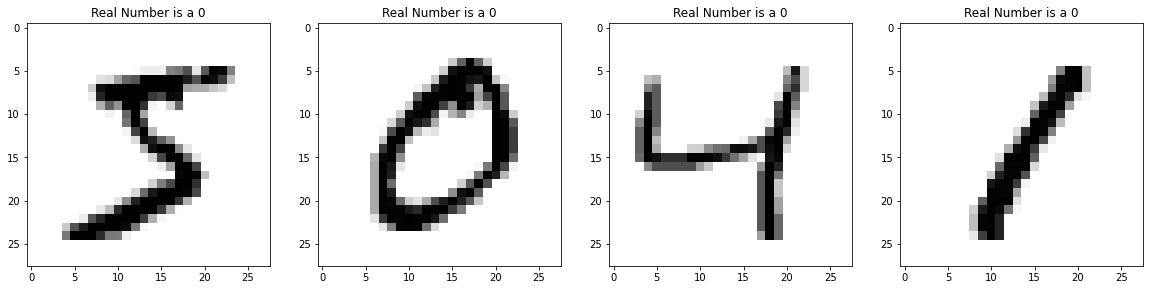

In [12]:
#plotting x_train data i.e. digits
X_train__ = x_train.reshape(x_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for j, ax in enumerate(axis.flat):
    ax.imshow(X_train__[j], cmap='binary')
    digit = y_train[j].argmax()
    ax.set(title = f"Real Number is a {digit}");

In [13]:
np.random.seed(1)
# Activation functions and their derivatives
def tanh(x):
    return np.tanh(x)

def tanhderiv(output):
    return 1 - (output ** 2)

def relu(x):
  return (x >= 0) * x # returns x if x > 0

def relud(output):
  return output >= 0 # returns 1 for input > 0

def softmax(x):
  temp = np.exp(x)
  return temp / np.sum(temp, axis=1, keepdims=True)   

In [20]:
Test_Accuracy=[]
Training_Accuracy=[]
Training_Error=[]
Test_Error=[]
lr_rate=.009 # Learning rate
batch_size=100 # batch size 
epochs=45 # number of iterations
# we are creating neural network with four layers 
pixels_per_image, hidden_size1,hidden_size2,hidden_size3,output  = (784,450,128,64,10) # specifying input, hidde layers and output layer neurons

# random initialization of weights for each layer
weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size1)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size1,hidden_size2)) - 0.1
weights_2_3 = 0.2*np.random.random((hidden_size2,hidden_size3)) - 0.1
weights_3_4 = 0.2*np.random.random((hidden_size3,output)) - 0.1
for j in range(epochs):
    error, correct_cnt = (0.0, 0)
 
  # forward propagation step

    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end = ((i * batch_size),((i+1)*batch_size))

        layer_0 = images[batch_start:batch_end]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask1 = np.random.randint(2,size=layer_1.shape) 
        layer_1 *= dropout_mask1 * 2 # dropout mask with 50 percent neurons active during training
        layer_2 = tanh(np.dot(layer_1,weights_1_2))
        dropout_mask2 = np.random.randint(2,size=layer_2.shape)
        layer_2 *= dropout_mask2 * 1.5
        layer_3=tanh(np.dot(layer_2,weights_2_3))
        layer_4 = softmax(np.dot(layer_3,weights_3_4))
          #print(layer_2)

        error += np.sum((labels[batch_start:batch_end] - layer_4) ** 2) #  mse per batch 
          #print(error)
        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_4[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1])) # counting how many prediction labels match with the true labels
  
  # back propagation step

        layer_4_delta = (labels[batch_start:batch_end]-layer_4)/batch_size
        layer_3_delta = layer_4_delta.dot(weights_3_4.T)* tanhderiv(layer_3)
        layer_2_delta = layer_3_delta.dot(weights_2_3.T)* tanhderiv(layer_2)
        layer_2_delta  *= dropout_mask2
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)* relud(layer_1)
        layer_1_delta *= dropout_mask1

  # updating weights at each layer during back propagation
        weights_3_4 += lr_rate * layer_3.T.dot(layer_4_delta)
        weights_2_3 += lr_rate * layer_2.T.dot(layer_3_delta)
        weights_1_2 += lr_rate * layer_1.T.dot(layer_2_delta)
        weights_0_1 += lr_rate * layer_0.T.dot(layer_1_delta)
                  
    
    test_correct_count = 0
    test_err=0.0

  # testing the images and predicting the labels
    y_pred=[]
    actual_label=[]
    for i in range(len(x_test)):
      layer_0 = x_test[i:i+1]
      layer_1 = relu(np.dot(layer_0,weights_0_1))
      layer_2 = tanh(np.dot(layer_1,weights_1_2))
      layer_3= tanh(np.dot(layer_2,weights_2_3))
      layer_4 = softmax(np.dot(layer_3, weights_3_4))
      
     
      y_pred+=[int(np.argmax(layer_4))]

      actual_label+=[np.argmax(y_test[i:i+1])]
      test_err += np.sum((y_test[i:i+1] - layer_4) ** 2)
      test_correct_count += int(np.argmax(layer_4) == np.argmax(y_test[i:i+1])) # count how many test data predicted labels match with true labels

      
    
    if(j%5==0):
      Test_Error.append(test_err/ float(len(x_test)))
      Test_Accuracy.append(test_correct_count/ float(len(x_test)))
      Training_Error.append(error/ float(len(images)))
      Training_Accuracy.append(correct_cnt/ float(len(images)))
      sys.stdout.write("\n" + \
                          "I:" + str(j) + \
                          " Test-Err:" + str(test_err/ float(len(x_test)))[0:5] +\
                          " Test-Acc:" + str(test_correct_count/ float(len(x_test)))+\
                          " Train-Err:" + str(error/ float(len(images)))[0:5] +\
                          " Train-Acc:" + str(correct_cnt/ float(len(images))))



I:0 Test-Err:0.806 Test-Acc:0.5641 Train-Err:0.880 Train-Acc:0.23993333333333333
I:5 Test-Err:0.233 Test-Acc:0.8544 Train-Err:0.356 Train-Acc:0.7713333333333333
I:10 Test-Err:0.166 Test-Acc:0.893 Train-Err:0.256 Train-Acc:0.8346333333333333
I:15 Test-Err:0.153 Test-Acc:0.9019 Train-Err:0.230 Train-Acc:0.8508166666666667
I:20 Test-Err:0.146 Test-Acc:0.9053 Train-Err:0.220 Train-Acc:0.8560833333333333
I:25 Test-Err:0.142 Test-Acc:0.9076 Train-Err:0.210 Train-Acc:0.8618
I:30 Test-Err:0.140 Test-Acc:0.9105 Train-Err:0.207 Train-Acc:0.8629166666666667
I:35 Test-Err:0.140 Test-Acc:0.9105 Train-Err:0.207 Train-Acc:0.862
I:40 Test-Err:0.141 Test-Acc:0.9099 Train-Err:0.208 Train-Acc:0.8597166666666667

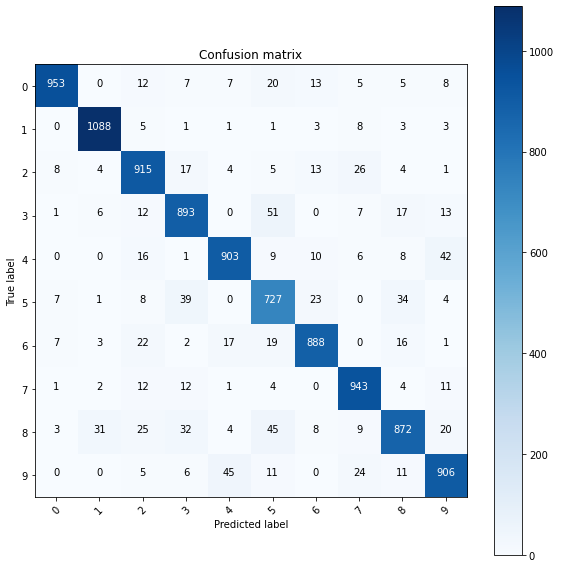

In [15]:
import itertools
"""
    function to print and plot confusion matrix
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# compute the confusion matrix
conf_mtx = confusion_matrix(y_pred, actual_label)
# plot the confusion matrix
fig = plt.figure(figsize=(8, 8))
plot_confusion_matrix(conf_mtx, classes = range(10)) 

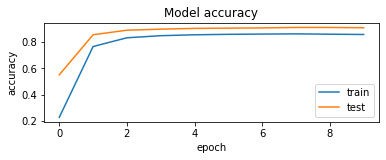

In [16]:
#plot to visualize training and testing accuracy
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(Training_Accuracy)
plt.plot(Test_Accuracy)
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

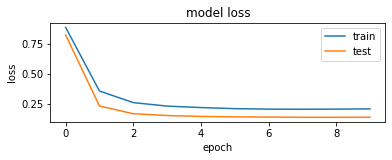

In [17]:
#plot to visualize training and test loss
plt.subplot(2,1,2)
plt.plot(Training_Error)
plt.plot(Test_Error)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [18]:
# Errors are difference between predicted labels and true labels
y_pred = np.array(y_pred) #converting it to numpy array
actual_label = np.array(actual_label)#converting it to numpy array
error = (y_pred - actual_label != 0)# check for errors i.e. y_pred doesnt match with actual_labels 

y_pred_err = y_pred[error]
actual_label_err = actual_label[error]
x_val_err = x_test[error]


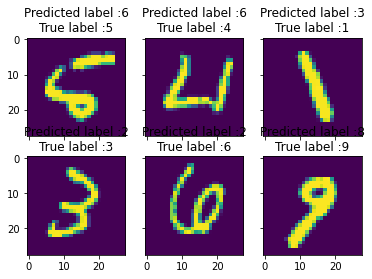

In [19]:
#Function to display common errors
def display_errors(img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    index = 0
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            ax[row,col].imshow((img_errors[index]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[index],obs_errors[index]))
            n += 1
            index+=1

# Show errors
display_errors(x_val_err, y_pred_err, actual_label_err)